<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-2-Regression-Classification/blob/master/Luc_Guittard_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [x] Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [x] Define a function to make new predictions and explain the model coefficient.
- [x] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

## Startup

In [2]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 90 (delta 17), reused 25 (delta 8), pack-reused 55
Unpacking objects: 100% (90/90), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 112kB 9.0MB/s 
     |████████████████████████████████| 133kB 41.9MB/s 
     |████████████████████████████████| 57.7MB 1.2MB/s 
     |████████████████████████████████| 7.1MB 40.3MB/s 
     |████████████████████████████████| 235kB 45.1MB/s 
     |████████████████████████████████| 614kB 36.6MB/s 
     |████████████████████████████████| 225kB 46.2MB/s 
     |████████████████████████████████| 768kB 50.3MB/s 
     |████████████████████████████████| 51

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

## 1st Look 

In [6]:
describe1 = df.describe()
print(df.shape)
df.describe()


(49352, 34)


,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03,0.525126,0.476982,0.476759,0.446486,0.424887,0.413965,0.365983,0.052541,0.268520,0.185423,0.177055,0.132821,0.138677,0.104089,0.087190,0.060686,0.055357,0.051852,0.046847,0.043929,0.042612,0.039370,0.027517,0.02620
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04,0.499373,0.499475,0.499465,0.497133,0.494331,0.492547,0.481710,0.223117,0.443194,0.388644,0.381719,0.339385,0.345613,0.305379,0.282116,0.238757,0.228679,0.221730,0.211313,0.204940,0.201983,0.194476,0.163585,0.15973
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [0]:
#import numpy as np
# arrayed1 = np.array(describe1) 
# std1 = arrayed1[2]  #indexing stds of each attribute for data of original df 

In [0]:
#What's the distribution of the target, price, and features such as longitude and latitude? Remove outliers. Predict cost of rent..

# try reducing distribution of samples to within 2-3stds (95% and 99.7% of data) 
#  -> a look at long. and lat. shows how distant from the mean some outliers may lie. 

## 2nd Look: Price 
min and max far from mean 

std = 2.206687e+04	
mean = 3.830174e+03	

In [0]:
import plotly.express as px
#px.scatter(df,x='price', y = 'latitude') 
#brief play with plotly to little avail -> decide to focus on stds

In [9]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np
df1_array = np.array(df)
#oops, don't forget about non-numeric features   -> or just play direct with full df via .query() fxn

high = 3830.174 +(2*22066.87)
low = 3830.174 -(2*22066.87)
print(high,low)

#mask = (df['price']>(3830.174 +(3*22066.87))) and (df['price']<(3830.174 -(3*22066.87)))  # how about that data formating?

pd.options.display.float_format = '{:5}'.format

mask = (df['price'] > low) & (df['price'] < high)  # ***be sure to use the '&' and not an 'and'***
df2 = df[mask]
df2.describe()

# so applying two stds shows a considerable decrease in the mean price (a drop of about $200.00); 
#  std is now also less than the mean - an encouraging update -> I'll stick with this 95th-percentile df2. 

47963.914 -40303.566


,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0,49332.0
mean,1.2115563934160383,1.541149760804346,40.741546077597,-73.95570459539374,3651.1768020757318,0.5250750020270818,0.47691153814967974,0.4768709965134193,0.446403956863699,0.4248358063731452,0.4140517311278683,0.3661315170680289,0.05254196059352956,0.2685883402254115,0.1853969026189897,0.17706559636746938,0.13283467120732992,0.13867266682883322,0.10413119273493879,0.08722533041433553,0.060690829481877887,0.0553596043136301,0.051873023595232305,0.04678504824454715,0.04386605043379551,0.0426295305278521,0.03938619962701695,0.0275277710208384,0.026210167842374118
std,0.49883490575913353,1.114308323028043,0.6386643555279476,1.1781503930661688,2183.435635504656,0.4993759098465919,0.4994717008307385,0.49946982507564663,0.4971242035321771,0.4943230697411237,0.49256249668402396,0.48175090431551126,0.2231195018341115,0.44322976657262614,0.38862314982306567,0.3817280769601484,0.3393994053733245,0.34560813004153035,0.3054337546747381,0.2821678331850955,0.23876475516657486,0.22868314018779948,0.2217728793208318,0.21118028204655362,0.2047990973255096,0.20202247639642773,0.19451399401189176,0.16361703916186585,0.15976142316145764
min,0.0,0.0,0.0,-118.271,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7283,-73.9917,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.7518,-73.9779,3150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.7743,-73.9548,4100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,8.0,44.8835,0.0,45000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 2nd Look: Location
From df1 to df2, nothing has changed in terms of the sample's location distribution

Let's focus only on those locations viably in New York; so, no Prime Meridian real estate (long. = 0).


In [11]:
px.scatter(df2, x ='latitude', y='longitude')

high_long = (-73.95570459539374 + (2*1.1781503930661688))
low_long = (-73.95570459539374 -(2*1.1781503930661688))
high_lat = (40.741546077597+(3*0.6386643555279476))
low_lat = (40.741546077597-(3*0.6386643555279476))

mask1 = (df2['longitude'] < high_long) & (df2['longitude'] > low_long)
mask2 = (df2['latitude'] < high_lat) & (df2['latitude'] > low_lat)

df3 = df2[mask1]
df3 = df3[mask2]
df3.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0,49301.0
mean,1.2114257317295796,1.5411249264720797,40.75095901705878,-73.97247681182864,3650.9683779233687,0.5251211942962617,0.47682602786961725,0.4770694306403521,0.44633983083507434,0.4250015212673171,0.4142309486622989,0.3661589014421614,0.05253443135027687,0.26855439037747714,0.18551347842842944,0.17703494858116467,0.13287762925701305,0.13865844506196628,0.10417638587452588,0.08728017687268007,0.060728991298350944,0.05539441390641164,0.05190564085921178,0.04677389910955153,0.043873349424960954,0.042656335571286584,0.0393906817305937,0.027545080221496522,0.026206364982454718
std,0.4984042260268991,1.1142800658465921,0.04012315442956423,0.032664945534323316,2182.4661539501567,0.49937359140266013,0.4994677438199657,0.4994789778531115,0.4971172888094566,0.49434824272892397,0.4925937389076965,0.48175851624529475,0.2231044026887145,0.4432120420602427,0.3887174971912766,0.38170214933504276,0.3394458749836407,0.34559326271847196,0.30549232310424984,0.28224805307887696,0.23883495961037063,0.2287508124381368,0.22183877819251166,0.21115635404836122,0.20481535469076204,0.20208315352594328,0.1945246088542504,0.1636670159523428,0.1597501457139194
min,0.0,0.0,39.7996,-75.5214,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7283,-73.9917,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.7518,-73.9779,3150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.7743,-73.9548,4100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,8.0,41.0868,-72.1336,45000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
#px.scatter(df3,'price')

In [12]:
#just go ahead and drop anything over 15k - the point where things start getting sparse
df4 = df3.query('price < 15001')
df4.describe()
#px.scatter(df4,'price')

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0,49066.0
mean,1.2009538173073004,1.5318754330901234,40.750889897281574,-73.97251644111951,3565.653099906249,0.5240084783760649,0.4770920800554355,0.47674560795662985,0.4464802510903681,0.42294052908327556,0.41323931031671624,0.36569110993355886,0.05266375901846492,0.267435698854604,0.18556637997798883,0.1750499327436514,0.13214853462682916,0.13789589532466473,0.10241307626462316,0.08678107039497819,0.06014348021032895,0.05492601801654914,0.051624342722047856,0.0459585048709901,0.04383891085476705,0.04249378388293319,0.039151347165043,0.0270859658419272,0.02620959523906575
std,0.47045806726738904,1.107055155052146,0.040160384828467614,0.031456316226961864,1758.2147575097795,0.4994283497158835,0.499480041433138,0.499464030247422,0.49713245053950245,0.49403118545045155,0.49242006923992004,0.48162833147383594,0.22336361459477105,0.442626071055388,0.3887603102555926,0.3800136799862227,0.3386556316354934,0.34479419991976223,0.3031938515245857,0.281516840389348,0.23775490335020957,0.22783811912942334,0.22126967213246967,0.20939726440068032,0.20473865064221078,0.20171487670176502,0.19395691760812922,0.16233561958558815,0.15975973377820182
min,0.0,0.0,39.7996,-75.5214,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7282,-73.9917,2495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.7518,-73.9779,3147.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.7742,-73.9548,4095.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,8.0,41.0868,-73.54,15000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 2nd Look: Unit Size

In [13]:
#brief look into no. of units

# df4['bathrooms'].unique()  # decide to use the std approach (3 stds here, just considering prior refinement)
# df4['bedrooms'].unique()

high_bath = (1.2009538173073004+(3*0.47045806726738904))
low_bath = (1.2009538173073004-(3*0.47045806726738904))
high_bed = (1.5318754330901234+(3*1.107055155052146))
low_bed = (1.5318754330901234-(3*1.107055155052146))

mask1 = (df4['bathrooms'] < high_bath) & (df4['bathrooms'] > low_bath)
mask2 = (df4['bedrooms'] < high_bed) & (df4['bedrooms'] > low_bed)

df5 = df4[mask1]
df5 = df5[mask2]
df5.describe()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0,48061.0
mean,1.163843865088117,1.4860489794219847,40.7507050331872,-73.97255156155644,3446.44732735482,0.5208797153617278,0.4779967125111837,0.4745635754561911,0.4472857410374316,0.42007032729239924,0.40937558519381617,0.3623520109860386,0.05318241401552194,0.26568319427394355,0.18538940096960113,0.1685982397370009,0.1313955181956264,0.13518237240173944,0.0968144649507917,0.08639021243835958,0.058092840348723494,0.05334886914546098,0.05133060069495017,0.04342398202284597,0.04336156134911883,0.04155136181103181,0.03805580408231206,0.026383138095337176,0.026424751877821933
std,0.3878100288600294,1.0606444369991446,0.040276249731005895,0.03145078226140763,1498.1125516994457,0.49956904452363987,0.499520817480947,0.49935776420814537,0.4972186148103015,0.4935750361586871,0.4917237500731797,0.4806847602283992,0.22439940416133106,0.44170091008780504,0.38861718091656555,0.37440057414066635,0.33783592282195235,0.3419218202135637,0.2957080380192872,0.2809423177304202,0.23392135598398428,0.22473054561817507,0.2206734767840509,0.2038116878637216,0.20367179348675865,0.1995637111080115,0.19133301221511084,0.16027352432241657,0.16039644530131644
min,0.0,0.0,39.7996,-75.5214,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.728,-73.9918,2495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.7515,-73.9781,3100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.7739,-73.9548,4000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.5,4.0,41.0868,-73.54,15000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
df5['bedrooms'].value_counts()  # ok, not to bad
# df5['terrace'].value_counts()
# df5['exclusive'].value_counts()
# df5['loft'].value_counts()      # the most exclusive measure? 

1    15723
2    14546
0     9463
3     6710
4     1619
Name: bedrooms, dtype: int64

## Mean Price (new) = $3446.45
Feel for the minimum wage workers, though the real estate options included are still very much inclusive of upper socio-economic levels

## Ploting 
Choose a feature, and plot its relationship with the target.
What target?

In [15]:
# Let's say that I'm in the market for a one bedroom, one bathroom apartement
mask_target = (df5['bedrooms'] == 1) & (df5['bathrooms'] == 1)

df6 = df5[mask_target]
#df6.head()
df6.describe() #new mean price is $3016.73; still quite a few options (15287)

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0,15287.0
mean,1.0,1.0,40.75146185647908,-73.97186190227,3016.731013279257,0.5002943677634591,0.4928370510891607,0.43370183816314517,0.45967161640609666,0.3974618957283967,0.3646889513966115,0.30306796624582977,0.045332635572708835,0.24995093870609014,0.19447896905867731,0.14548309020736575,0.1076731863675018,0.09616013606332177,0.06129390985804932,0.062471380911885914,0.040622751357362465,0.05187414142735658,0.04677176686073134,0.030287172107019037,0.05233204683718192,0.01857787662719958,0.025838948125858574,0.025511872833126184,0.021717799437430498
std,0.0,0.0,0.040457544623357856,0.03409508747101276,912.9787648339495,0.5000162679117649,0.4999650424188143,0.4956012722182103,0.49838726901332914,0.48938901109842764,0.481358574445755,0.45959938186248656,0.2080394648038894,0.43299853517878134,0.39581201098903407,0.35259877120693933,0.30997734880702676,0.29482036922567423,0.23987649009985607,0.242017641929072,0.19742110572964588,0.22178014431386547,0.21115654229093062,0.17138197300044006,0.22270304910045552,0.13503307706242337,0.1586598360492795,0.1576789255701732,0.14576531320316105
min,1.0,1.0,39.7996,-75.5214,401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7298,-73.9919,2395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.7539,-73.97800000000002,2900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,40.7739,-73.9547,3540.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,41.0412,-73.54,13845.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
# now to plot a select feature against target 

#stick with df5 to provide some proper 2-dimensional distribution/scatter
#px.scatter(df5, 'bedrooms', 'price')

# ..or not
px.scatter(df6, 'bedrooms', 'price')


## Linear Regression
Use scikit-learn for linear regression with one feature. You can follow the 5-step process from Jake VanderPlas.

In [0]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#model-type
model = LinearRegression()

# #plot components
# features = df['longitude']
# target = df['price']
# X = [features]
# y = [target]

# #prediction
# model.fit(X,y)
# y_pred = model.predict(X)

# #plot
# plt.scatter(X,y)
# plt.scatter(X,y_pred)





In [0]:
#plot components
features = ['latitude']#,'longitude')  #latitude is N./S. 
target = 'price'
X = df6[features]
y = df6[target]

# #prediction
# model.fit(X,y)
# y_pred = model.predict(X)

# #plot
# plt.scatter(X,y)
# plt.scatter(X,y_pred)

In [0]:
#prediction  
model.fit(X,y)
y_pred = model.predict(X)

(800, 8000)

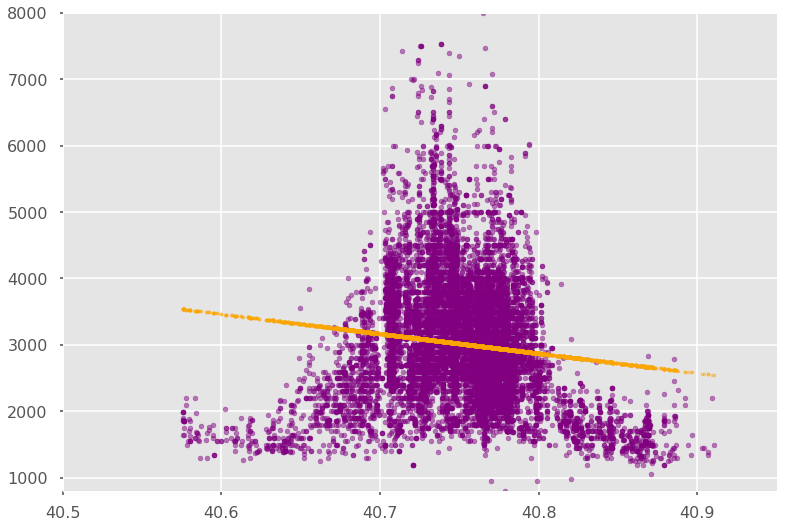

In [129]:
#plot
plt.style.use('ggplot')

fig,ax = plt.subplots()
plt.scatter(X,y, s = 24, alpha = .5, c='purple')      #actual
plt.scatter(X,y_pred, s= 10, alpha = .4, color = 'orange') #prediction

ax.set_xlim(40.5,40.95)
ax.set_ylim(800, 8000)

In [86]:
print(model.coef_[0])
model.intercept_

-2961.0393427510176


123683.41284493209

## Defining a fxn to make new predictions 

In [123]:
def predict(latitude):
  y_pred = model.predict([[latitude]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  result = f'${estimate:,.0f} estimated price for an appartment sitting at {latitude:,.2f} degrees North in New York City.'
  if estimate > 3450.00:
    print('Try looking further North. You see, Southside has become really popular')
  else:
    print('Not a bad price, considering the neighborhood.')
  return result

predict(40.6)

Try looking further North. You see, Southside has become really popular


'$3,465 estimated price for an appartment sitting at 40.60 degrees North in New York City.'

In [120]:
# for slider interactive

from ipywidgets import interact

interact(predict, latitude=(40.6,40.9)); #no output

interactive(children=(FloatSlider(value=40.75, description='latitude', max=40.9, min=40.6), Output()), _dom_cl…

In [121]:
predict(40.9)

Not a bad price, considering the neighborhood.


'$2,577 estimated price for an appartment sitting at 40.90 degrees North in New York City.'